# AutoEncoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

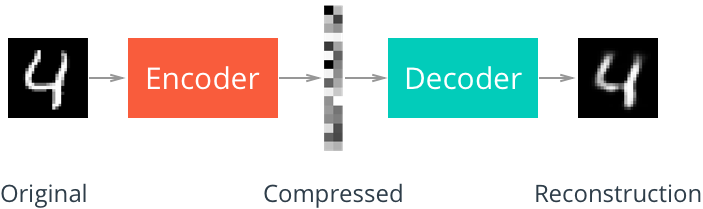

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define a transformation to convert PIL images to PyTorch tensors
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1,))])

# Load the training dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

# Load the test dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# Define DataLoaders to iterate over the datasets in batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

(10,)


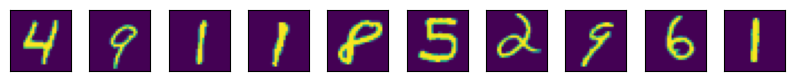

In [ ]:
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
def show_images(imgs):
    num_imgs = min(10, len(imgs))
    nrow=1
    ncol = num_imgs//nrow
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10, 20))
    print(axes.shape)
    for i in range(nrow):
        if nrow > 1:
            for j in range(ncol):
                axes[i][j].imshow(imgs[i*ncol+j][0])
                axes[i][j].set_xticks([])
                axes[i][j].set_yticks([])
        else:
            for j in range(ncol):
                axes[j].imshow(imgs[i*ncol+j][0])
                axes[j].set_xticks([])
                axes[j].set_yticks([])
            
    #     axes[i].imshow(imgs[i][0])
    plt.subplots_adjust(hspace=0.5, wspace=0.3, top=0.9, bottom=0.1)
    plt.show()

img, label = next(iter(train_loader))
show_images(img)

In [ ]:
from torch import nn as nn

class AE(nn.Module):
    def __init__(self, encoder_dim):
        super(AE, self).__init__()
        self.fc1 = nn.Linear(28*28, encoder_dim)
        self.fc2 = nn.Linear(encoder_dim, 28*28)
        self.act1 = nn.ReLU()
        self.act2 = nn.Sigmoid()
    
    def forward(self, x):
        encoded = self.act1(self.fc1(x))
        decoded = self.act2(self.fc2(encoded))
        return decoded

In [ ]:
device = 'cuda'
criterion = nn.MSELoss()

In [ ]:
def trainer(encoder_dim):
    ae = AE(encoder_dim).to(device)
    optimizer = torch.optim.Adam(ae.parameters(), lr=0.001)
    epochs = 20
    for j in range(epochs):
        sum_loss = 0
        for i, data in enumerate(train_loader):
            img, label = data
            img = img.squeeze(1).view(-1, 28*28).to('cuda')
            output = ae(img)
            optimizer.zero_grad()
            loss = criterion(img, output)
            sum_loss += loss.item()
            loss.backward()
            optimizer.step()
        avg_loss = sum_loss/len(train_loader)
        # print(f"Epoch {j}: Loss={avg_loss:0.2}")
    return ae

In [ ]:
def tester(ae):
    img, label = next(iter(test_loader))
    show_images(img)
    img = img.squeeze(1).view(-1, 28*28).to('cuda')
    output = ae(img).view(-1, 28, 28).unsqueeze(1).to('cpu').detach().numpy()
    show_images(output)

32
(10,)


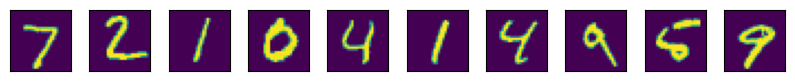

(10,)


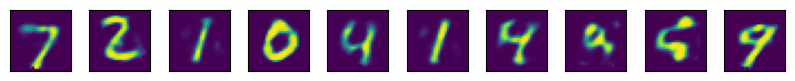

16
(10,)


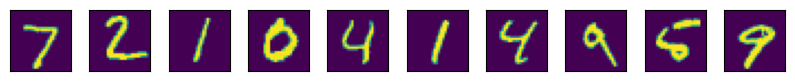

(10,)


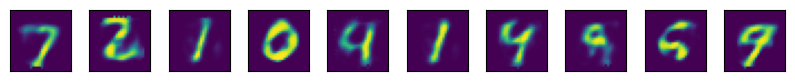

8
(10,)


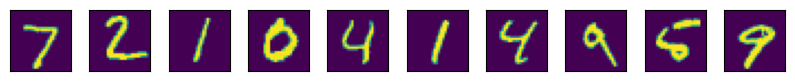

(10,)


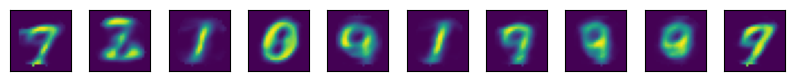

4
(10,)


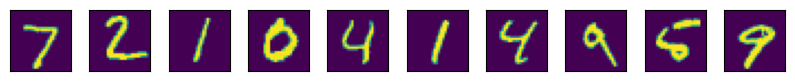

(10,)


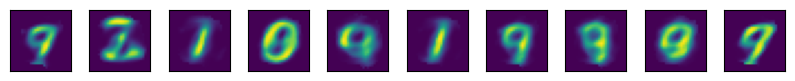

2
(10,)


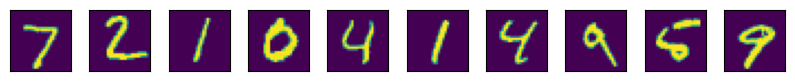

(10,)


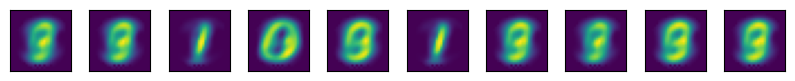

In [ ]:
for encoder_dim in [32,16,8,4,2]:
    print(encoder_dim)
    ae = trainer(encoder_dim)
    tester(ae)